<h1> <font  color = 'deeppink'> THINGS WE HAVE TO DO </font> </h1>
- Evaluation of significance (we actually have to do statistical tests for this)
- Multi-variable linear regression
- Write intro and conclusion

<h1> Has Quarantine Changed Our Queues? </h1>
Understanding the impact of COVID-19 Quarantine on our Spotify streaming <br>

 ANDERS JENSEN, Cornell University <br> 
 KAELA OLSEN, Cornell University <br>

<h4> May 5th, 2020 <br>
Info 2950: Intro to Data Science </h4>

<h2> Introduction </h2>

<p>At the end of 2019, various reports came out of China about the emergence of a SARS-like illness referred to as CoronaVirus, or COVID-19. On January 11th, China reported its first death. On January 23rd, Wuhan, the city housing the outbreak, locked down its citizens into self-quarantine. Meanwhile, the World Health Organization declined to categorize the disease as a global health emergency, explaining that there was no evidence of human infection outside of China. They were wrong. Quickly, the disease spread to Europe, the Americas, and eventually every country on earth, with only a few exceptions. Infection hubs like Italy, Spain, and Iran were the first to issue nation-wide quarantines to slow the spread, but most governments followed suit shortly after. In the span of a few months, the global economy, and more importantly, livelihoods of everyday people, completely shut down.</p> 

<p>Quarantine has looked different for everyone, but isolating oneself at home for a long period of time is certainly boring and tedious. Many researchers are investigating potentially negative, psychological effects of this experience. Longer quarantine duration is being linked to frustration, boredom, and depression, in addition to the financial losses many families are enduring. These hypotheses are speculative, and it’s imperative that more research is done to assess the effect quarantine is having on people’s mental health.</p> 

<p> Before this pandemic, a common outlet for people to release some stress was to turn to music. Listening to music is often soothing for people under any circumstances, and has become a routine part of the day. Further, access to music has become extremely easy. Spotify is the largest subscription music streaming service with 170 million users, providing premium audio quality at 320kbps, higher than any competitor, including Apple music.</p> 

<p>**Research Questions:** For the purpose of this research study, we would like to analyze the effect that the COVID-19 quarantine has had on people's music choices, and use Spotify as a way to track the changes. By analyzing the specific characteristics of the songs people are listening to while isolated, we can illustrate how this quarantine has affected the mental well-being of everyday people. Has the quarantine made people listen to more sad and depressing music? Or, rather, are people listening to more uplifting music? How has the pandemic affected what type of music we are listening to? Is dance music less popular?  </p> 

<p>**Findings: ** The results of our analysis showed that... </p>


<h2> Data Description </h2>
<br>

<em> **What are the observations (rows) and the attributes (columns)?** </em> <br>
<br>
For the data analysis, three datasets were created: playlists.csv, tracks_list_unfiltered.csv, and tracks.csv.
In the playlists.csv data set, each observation (row) represents a unique playlist created by a user of Spotify's platform. In particular, each playlist in the data set has the word "quarantine" in either the title or the description of the playlist. Each playlist also has a number of (attributes) that describe it. The first attribute is the name, listing the name the user entered for the playlist. The total attribute displays the number of songs in each playlist, and the URI attribute prints Spotify's unique playlist URI for that example.

Next, tracks_list_unflitered.csv was created using playlists.csv using the processes explained below. In this new dataset, each observation represents a song that was contained in one of the playlists in playlists.csv, while there are many attributes for each song. First, the URI of each song is listed, followed by the release date of each song, and then several audio features, including popularity, explicit, danceability, and key, each of which is assigned to a numeric value. The only exception to this is the explicit attribute, to which a boolean value of True or False is assigned to each song. 

Finally, tracks.csv was created in the same format as tracks_list_unfilitered.csv with one significant change. Each song that was a duplicate in tracks_list_unfiltered was removed, leaving unique songs. The observations and attributes of this final data set are otherwise identical.


<em> **Why was this dataset created?**</em>  <br> 
<br>
This dataset was created to measure the effect that COVID-19 quarantine has had on people's music choices. Further, by analyzing the specific characteristics of the songs extracted, we will illustrate how this quarantine has affected the mental well-being of everyday people. 


<em> **Who funded the creation of the dataset?** </em> <br>
<br>
Spotify is an audio streaming platform that provides easy access to over 50 million tracks. Users can browse the platform, filtering by artist, album, or genre, as well as create unique playlists to complement their music taste. Individuals who create an account on Spotify (and potentially purchase Spotify premium for unlimited free downloads) agree to share their listening data with the public. That data is used to improve algorithms that offer music recommendations to users, but also provides an opportunity for research on user data.

To that end, the creation of this dataset was made possible by Spotify's Web API, through which web developers can access catalog data for the creation of apps, software, websites, and more. Spotify funded the Web API to facilitate better use of its platform by third-party developers. 

Through the Spotify Web API, external applications retrieve Spotify content like playlists and specific song data. In order to access user-related data through Spotify's API, an application must be authorized by the user to access that particular information. Create a simple server-side application that accesses user-related data through the Spotify Web API. Using the Spotify Developer Platform, audio features from tracks can be calculated. For example, a song's valence, beats per second (bps), and even danceability. Spotify's Developer API allows coders to read calculated audio features of tracks to learn about its danceability, energy, valence, and more. For more advanced use cases, it is possible to read in-depth analysis data about tracks such as the segments, bars, beats, pitches, and more.


<em>**What processes might have influenced what data was observed and recorded and what was not?**</em> <br>
<br>
There are various processes along each step of our data collection that influenced what data was observed and recorded, and what was not. The first factor is whether or not a Spotify user's playlist was public or not. We only collected data on public playlists. The next is the process we used to differentiate "quarantine playlists" from non-quarantine playlists. We decided to filter playlists based off of their title and playlist description. If either of these contained the word "quarantine," then we recorded it. However, this process could have been altered by changing the term to "Coronavirus" or "COVID." Due to the pure scope of the number of data points, this would flood our dataset. We decided to narrow down our search to only one term: "Quarantine." We could have also filtered playlists by country if we only wanted to look at quarantine playlists in the United States. Another process that influenced data observation was the search limitations on Spotify. Spotify only lets users receive two thousand results per search with Spotify API. This limited the number of data points we could record and analyze. 


<em>**What preprocessing was done, and how did the data come to be in the form that you are using?**</em> <br>
<br>
The preprocessing that Spotify did before we even began data scraping was pairing each playlist and each song with a Uniform Resource Identifier (URI). Every object has its own URI: users, songs, playlists, artists, albums, episodes. The relevant preprocessing for us was that Spotify matches each URI with the playlist name, and within each playlist unit, lists each track, and the relevant data for that track. 

First, we used Spotify API to collect all public playlists with the term "quarantine" in either their title or in their description. The search for "quarantine"-containing playlists gave us 289,213 playlists. However, Spotify's API only lets us extract data at a rate limitation of two thousand results per search. This meant we could only access a subset of the entire dataset, thus meaning our data collection was of a sample of data, rather than all data on Spotify's "quarantine"-containing playlists. 

Upon scraping Spotify for a playlist containing "quarantine," we extracted the playlist name, the total number of tracks, and its URI. We put this data in playlists.csv. Then, using the URI of each playlist, we used a Spotipy function called playlist_tracks() to extract the URI's of the individual track in a "quarantine" playlist. Then, we created a data frame with the results of playlist_tracks(), called tracks, and created the datafile tracks_list_unfiltered.csv with this data. However, this tracklist is unfiltered because it only had the track URI and the count or the number of different times it appeared in playlists (i.e., how many different "quarantine" playlists it was in). We then cut out any songs that appeared less than 4 times (i.e., appeared in less than 4 distinct playlists), reducing the track count from 130,806 to 8,944 songs. 

Once we had the list of raw track data, we worked to make the data usable, informative, and insightful. We created a function called filter_data(), which used the Spotipy function track() to access the name, popularity, release date, and explicitness of each song. We also used Spotipy's audio_features() function to access then the tracks' audio features, which include variables like "danceability," "energy," "key," and "loudness." Our function filter_data() thus turned each track URI into a slew of exciting values for each of these track variables, giving us valuable information and available metrics for our data analysis. 


<em>**If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?**</em> <br>
<br>
Speaking from personal experience, when users use Spotify to stream music, thoughts, and concerns surrounding their data and its privacy rarely surface. Users see Spotify as purely a music streaming app, a place where they can find relaxation, joy, emotional release. People see Spotify for what it provides -- music. Rarely do they stop to consider how their behavior is tracked or how their data is stashed.

Of course, the notion that Spotify is paying attention to you is on the peripheral. Spotify makes it clear that it cares about you, through its curation of "Discover Weekly" playlists made just for you, through its live stream of what the people you follow are listening to, through the ways it recommends additional songs for you to listen when you finish the last song in a playlist. Like most popular applications today, Spotify tracks user data to understand what its users enjoy so that it can provide more of it. It is transparent, albeit easy-to-overlook, that Spotify is collecting data on users. 

However, users are unaware of the data collection process and precisely what data is being collected. If we had never done this project, we would have never learned the metrics Spotify uses to understand my music taste. Now we know that it's based on variables like valence, tempo, popularity, danceability, etc. We would have never known that anyone with a Spotify account can see my public playlists and the tracks in each playlist; or, even eerier, what the last song we listened to was. We knew our followers would view my song streaming, but never stopped to think that since anyone can follow us, anyone can access our streaming history. Users of Spotify are aware of the data collection process -- they have to be, as it is built into Spotify's most enjoyable and exciting features. However, in today's society, users are so accustomed to curated worlds shaped by variations of media being fed to users through an infinite feed of recommendations by machine-learning AI. We have become numb to our data being collected and reflected back to us, and with Spotify, as with many other popular apps, most users do not stop to think about the reasons, the methods, and the people behind its data collection.


<em>**Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted in a Cornell Google Drive or Cornell Box).**</em> <br>
<br>
Technically, our raw data source is the Spotify music streaming application. We used Spotipy to scrape Spotify for playlist and track data. We created a variety of data sets, two of them being the "raw data," and the final one is what we will use for our analysis. The two "raw data" sets are track_list_unfiltered.csv and playlists.csv. The finalized dataset is track_list.csv.




<h2> Housekeeping </h2>
<p> For the sake of readability and ease of use, we are going to implement our imports and functions first. This way, the function code does not jumble to data analysis. 

In [1]:
#import python libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import spearmanr, t

In [2]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html
def t_test_means(feature, alpha):
    n_2019 = len(tracks_2019[feature])
    n_quar = len(tracks[feature])
    
    se_2019 = tracks_2019[feature].std()/np.sqrt(n_2019)
    se_quar = tracks[feature].std()/np.sqrt(n_quar)
    
    sed = np.sqrt(se_2019**2 + se_quar**2)
    
    t_stat =(np.mean(tracks_2019['tempo'])-np.mean(tracks['tempo']))/sed
    
    df = n_2019 + n_quar - 2
    
    alpha = 0.05
    cv = t.ppf(1.0-alpha,df)

    p = (1-t.cdf(abs(t_stat), df))**2
    
    output = dict()
    output['t-statistic: '] = t_stat
    output['df'] = df
    output['cv'] = cv
    output['p'] = format(p, '.8f')
    
    return output

In [3]:
def concatenate_df():
    one_list = []
    for x in range(len(tracks)):
        one_list.append(1)  

    zero_list = []
    for x in range(len(tracks_2019)):
        zero_list.append(0)
    
    df_quarantine = tracks.assign(quarantine = one_list)
    df_2019 = tracks_2019.assign(quarantine = zero_list)
    
    new = pd.concat([df_quarantine, df_2019], sort=False)
    new["explicit"] = new["explicit"].astype(int)
    new = new.drop(columns=['id', 'type', 'track_href', 'analysis_url', 'time_signature', 'uri'])
    return new

In [4]:
#function to compare the correlation coefficients of linear regressions
def corr_compare(x, y):
    corrcoef = np.corrcoef(x, y)[0][1]
    print('Correlation: {:.4f}'.format(corrcoef))
    
    rank_corrcoef = np.corrcoef(x.rank(), y.rank())[0][1]
    print('Correlation of ranks: {:.4f}'.format(rank_corrcoef))
    
    spearman_r = spearmanr(x, y)
    print('Spearman r: {:.4f}'.format(spearman_r.correlation))

In [5]:
#returns a list of the permuted differences for each trial in parameter *trials* for the parameter *feature*
def permuted_diff_list(feature, trials):
    diff_list = []
    for x in range(trials):
        
        new['quarantine'] = np.random.permutation(new["quarantine"].copy())

        list_2019 = [] # when 0 means 2019 songs
        list_quar = [] # when 1 means quarantine songs

        for i in range(len(new)):
            if new['quarantine'].iloc[i] == 0:
                list_2019.append(new[feature].iloc[i])
            else:
                list_quar.append(new[feature].iloc[i])

        diff = np.mean(list_2019) - np.mean(list_quar)

        diff_list.append(diff)
        
    return diff_list

In [6]:
def plot_permuted_diff(feature, data):
    plt.hist(data, bins=50)
    plt.title("Mean Differences with Permuted Quarantine: "+str(feature))
    plt.xlabel('Differences')
    plt.ylabel('Count')
    plt.show()

In [7]:
def actual_diff(feature):
    mean_quarantine = np.mean(tracks[feature])
    mean_2019 = np.mean(tracks_2019[feature])
    diff = mean_2019 - mean_quarantine
    return round(diff, 6)

In [8]:
def data_pvalue(data, trials, feature):
    count = 0
    for d in data:
        if d > abs(actual_diff(feature)):
            count += 1
    p_value = format((count/trials), '.8f')
    
    print("permutations:")
    print("p_value from permutations: ", p_value)
    print("number of trials: ", n)

In [9]:
#function that creates pie chart for the explicit variable
def pie_explicit(dataset, data_name):
    count = 0
    for i in dataset['explicit']:
        if i == 1:
            count += 1
    percent_explicit = count/len(dataset['explicit'])
    
    explicit =  (percent_explicit*100)
    clean = (1-percent_explicit)*100
    
    labels = 'Explicit', 'Clean'
    fig1, ax1 = plt.subplots()
    
    ax1.pie([explicit, clean], 
            explode = (0, 0.1), 
            autopct='%1.1f%%', 
            colors = ['#1DB954', 'darkgrey'],
            shadow=True, 
            startangle=90)

    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    
    plt.legend(labels, loc="best")
    plt.title("What proportion of " + data_name + " were explicit?")
    plt.show()
    
    #explicit_breakdown = {'explicit': explicit, 'clean': clean}
    explicit_breakdown = [explicit, clean]
    return explicit_breakdown

In [10]:
#reusable function for bar chart creation, comparing a variable across two data sets
def two_bar(data_2019, data_quar, title, ticks):
    
    bars2019 = data_2019 #green
    barsquar = data_quar #gray
    
    barWidth = 0.3
    r1 = np.arange(len(bars2019))
    r2 = [x + barWidth for x in r1]
    
    
    plt.bar(r1, bars2019, color='#1DB954', width=barWidth, edgecolor='white', label='2019')
    plt.bar(r2, barsquar, color='darkgrey', width=barWidth, edgecolor='white', label='Quarantine')
    
    plt.xlabel('Tracks')
    plt.ylabel('Percentage of Total')
    plt.title(title)
    plt.xticks([0.15+r for r in range(len(bars2019))], ticks)
    
    plt.legend()
    plt.show()

In [11]:
#Counts the number of songs with each key, returns the percentage of total
def key_counter(dataset):
    count_0 = 0
    count_1 = 0
    count_2 = 0
    count_3 = 0
    count_4 = 0
    count_5 = 0
    count_6 = 0
    count_7 = 0
    count_8 = 0
    count_9 = 0
    count_10 = 0
    count_11 = 0
    for i in dataset['key']:
        if i == 1:
            count_0 += 1
        if i == 1:
            count_1 += 1
        if i == 2:
            count_2 += 1
        if i == 3:
            count_3 += 1
        if i == 4:
            count_4 += 1
        if i == 5:
            count_5 += 1
        if i == 6:
            count_6 += 1
        if i == 7:
            count_7 += 1
        if i == 8:
            count_8 += 1
        if i == 9:
            count_9 += 1
        if i == 10:
            count_10 += 1
        if i == 11:
            count_11 += 1
    key_counts = [count_0, count_1, count_2, count_3, count_4, count_5, count_6, count_7, count_8, count_9, count_10, count_11]
    key_percentage = []
    for count in key_counts:
        key_perc = (count/len(dataset['key']))*100
        key_percentage.append(key_perc)
    return key_percentage

In [12]:
#Creates a pie chart for the keys
def key_pie(key_counts, data_name):
    
    labels = 'C', 'C♯/D♭', 'D', 'D♯/E♭', 'E', 'F', 'F#/G♭', 'G', 'G♯/A♭', 'A', 'A♯/B♭', 'B'
    fig1, ax1 = plt.subplots()

    ax1.pie(key_counts, 
            explode= (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), 
            colors = ["#FFD699", "#FFB266", "#FFFF99", "#CCFF99", "#99FFFF", "#9933FF", "#009999", "#99CCFF", "#FF99CC", "#FF0077", "#FFFF00", "#E0E0E0", "#999FF"], 
            autopct='%1.0f%%',
            shadow=True, 
            startangle=90)
    
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.legend(labels, loc="best")
    plt.title("What proportion of " + data_name + " were which keys?")
    plt.show()

In [13]:
 def mode_counter(dataset, data_name):
    print(data_name)
    #Major keys are denoted as 1, Minor keys denoted as 0
    #Could combine this function with pie chart function
    count_major = 0
    count_minor = 0
    for i in dataset['mode']:
        if i == 1:
            count_major += 1
        if i == 0:
            count_minor += 1
    
    print("count_major: ", count_major)
    print("count_minor: ", count_minor)
    
    percent_major = count_major/len(dataset['mode'])
    print('percent_major: ','{:.2%}'.format(percent_major))
    
    mode_breakdown = [count_major/len(dataset['mode']), count_minor/len(dataset['mode'])]
    
    return mode_breakdown

In [14]:
def modality_pie(breakdown, data_name):
    
    labels = 'Major', 'Minor'
    sizes = breakdown
    
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, 
            explode = (0.1, 0),  
            autopct = '%1.1f%%', 
            colors = ['#1DB954', 'darkgrey'],
            shadow = True, 
            startangle=90)
    
    plt.legend(labels, loc="best")
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(data_name + ": Major or Minor?")
    plt.show()

In [15]:
#creates a dataframe with the summary statistics for quantitative variables
def summary_stats(dataset):
    rows = []
    features = ['energy', 'danceability', 'valence', 'acousticness', 'speechiness', 'tempo'] 
    stats = ['mean', 'median', 'var' , 'std']

    for feat in features:
        feature = dataset[feat]
        mean = '{:.4f}'.format(feature.mean())
        median = '{:.4f}'.format(feature.median())
        var = '{:.4f}'.format(feature.var())
        std = '{:.4f}'.format(feature.std())
        rows.append([mean, median, var, std])

    df = pd.DataFrame(rows, columns=stats)
    for x in range(len(features)):
        df = df.rename({x: features[x]})
    return df

In [16]:
#creates a box plot that compares one feature across quarantine tracks and 2019 tracks
def box_plot_comparisons(feature):
    
    x = tracks_2019[feature]
    y = tracks[feature] 
    
    data_to_plot = x, y
    fig = plt.figure(1, figsize=(8, 7))
    ax = fig.add_subplot(111)
    bp = ax.boxplot(data_to_plot)
    bp = ax.boxplot(data_to_plot, patch_artist=True)
    
    for box in bp['boxes']:
        box.set( color='black', linewidth=2)
        box.set( facecolor = '#1DB954' )
    
    for whisker in bp['whiskers']:
        whisker.set(color='black', linewidth=2)
    
    for cap in bp['caps']:
        cap.set(color='black', linewidth=2)
    
    for median in bp['medians']:
        median.set(color='#b2df8a', linewidth=2)
    
    for flier in bp['fliers']:
        flier.set(marker='o', color='#e7298a', alpha=0.5)
    
    ax.set_xticklabels(['2019 Tracks', 'Quarantine Songs'])
    plt.title(feature + ": Quarantine vs. 2019")
    plt.ylabel("Scale")
    plt.show()

<h2> Data Analysis </h2>
<p> To begin, let's take a look at the two data sets that will be compared for the subsequent analysis. </p>

In [17]:
tracks = pd.read_csv("tracks_list.csv")
#shows a snipit of the data set (20 songs), sorted by appearances
tracks.sort_values(by=['count'], ascending=False)[:20]

,Unnamed: 0,uri,count,name,release_date,popularity,explicit,danceability,energy,key,...,instrumentalness,liveness,valence,tempo,type,id,track_href,analysis_url,duration_ms,time_signature
119,221,spotify:track:127QTOFJsJQp5LbJbu3A1y,176,Toosie Slide,2020-04-03,99,True,0.834,0.454,1,...,0.000006,0.1140,0.837,81.618,audio_features,127QTOFJsJQp5LbJbu3A1y,https://api.spotify.com/v1/tracks/127QTOFJsJQp...,https://api.spotify.com/v1/audio-analysis/127Q...,247059,4
146,259,spotify:track:1Cv1YLb4q0RzL6pybtaMLo,172,Sunday Best,2019-01-06,96,False,0.878,0.525,5,...,0.000000,0.0714,0.694,112.022,audio_features,1Cv1YLb4q0RzL6pybtaMLo,https://api.spotify.com/v1/tracks/1Cv1YLb4q0Rz...,https://api.spotify.com/v1/audio-analysis/1Cv1...,158571,4
1002,2564,spotify:track:7eJMfftS33KTjuF7lTsMCx,155,death bed (coffee for your head) (feat. beabad...,2020-02-08,99,False,0.726,0.431,8,...,0.000000,0.6960,0.348,144.026,audio_features,7eJMfftS33KTjuF7lTsMCx,https://api.spotify.com/v1/tracks/7eJMfftS33KT...,https://api.spotify.com/v1/audio-analysis/7eJM...,173333,4
116,218,spotify:track:6WrI0LAC5M1Rw2MnX2ZvEg,151,Don't Start Now,2019-10-31,97,False,0.794,0.793,11,...,0.000000,0.0952,0.677,123.941,audio_features,6WrI0LAC5M1Rw2MnX2ZvEg,https://api.spotify.com/v1/tracks/6WrI0LAC5M1R...,https://api.spotify.com/v1/audio-analysis/6WrI...,183290,4
1006,2569,spotify:track:0nbXyq5TXYPCO7pr3N8S4I,147,The Box,2019-12-06,99,True,0.896,0.586,10,...,0.000000,0.7900,0.642,116.971,audio_features,0nbXyq5TXYPCO7pr3N8S4I,https://api.spotify.com/v1/tracks/0nbXyq5TXYPC...,https://api.spotify.com/v1/audio-analysis/0nbX...,196653,4
1753,6284,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,139,Blinding Lights,2020-03-20,100,False,0.514,0.730,1,...,0.000095,0.0897,0.334,171.005,audio_features,0VjIjW4GlUZAMYd2vXMi3b,https://api.spotify.com/v1/tracks/0VjIjW4GlUZA...,https://api.spotify.com/v1/audio-analysis/0VjI...,200040,4
118,220,spotify:track:0sf12qNH5qcw8qpgymFOqD,136,Blinding Lights,2019-11-29,93,False,0.513,0.796,1,...,0.000209,0.0938,0.345,171.017,audio_features,0sf12qNH5qcw8qpgymFOqD,https://api.spotify.com/v1/tracks/0sf12qNH5qcw...,https://api.spotify.com/v1/audio-analysis/0sf1...,201573,4
144,257,spotify:track:3Dv1eDb0MEgF93GpLXlucZ,133,Say So,2019-11-07,97,True,0.787,0.673,11,...,0.000004,0.0904,0.786,110.962,audio_features,3Dv1eDb0MEgF93GpLXlucZ,https://api.spotify.com/v1/tracks/3Dv1eDb0MEgF...,https://api.spotify.com/v1/audio-analysis/3Dv1...,237893,4
846,1723,spotify:track:6K4t31amVTZDgR3sKmwUJJ,132,The Less I Know The Better,2015-07-17,86,True,0.640,0.740,4,...,0.006780,0.1670,0.785,116.879,audio_features,6K4t31amVTZDgR3sKmwUJJ,https://api.spotify.com/v1/tracks/6K4t31amVTZD...,https://api.spotify.com/v1/audio-analysis/6K4t...,216320,4
433,809,spotify:track:4nK5YrxbMGZstTLbvj6Gxw,130,Supalonely,2019-11-15,95,True,0.863,0.631,7,...,0.000030,0.1230,0.817,128.977,audio_features,4nK5YrxbMGZstTLbvj6Gxw,https://api.spotify.com/v1/tracks/4nK5YrxbMGZs...,https://api.spotify.com/v1/audio-analysis/4nK5...,223480,4


<h3> A quick look at the quarantine songs </h3>

<p> Displayed above is a snippet of the tracks.csv dataset, arranged by the number of appearances. (Note: the column above is labeled "count", but we will refer to this value as appearances. </p>

<p> As printed above, the top five songs of quarantine are 'Toosie Slide' by Drake, 'Sunday Best' by Surfaces, 'death bed' by Powfu and beabadoobee, 'Don't Start Now' by Dua Lipa, and 'The Box' by Roddy Rich. These five songs are all on the US Top 50 tracks charts list as of May 11th, 2020. It seems as if, at least for the top 20 quarantine songs, their number of appearances has more to do with what is trending and less to do with the emotional, physical, and mental circumstances of quarantine.</p>

Does this hold true for the rest of the dataset? Are the songs of quarantine just the songs of the time period of quarantine, or the songs of our emotional state in quarantine? For now, only the top 20 songs are visible, and as of May 11th, the only songs in the top 20 of our data set that weren't on the US Top 50 list were "Toxic", 'Tongue Tied' and 'U Can't Touch This'. However, every other song was on the US Top 50 list. It is interesting to note the disproportional popularity of "Toxic" and "U Can't Touch This."

It would be useful to understand the overall appearances of each song. We can use basic stats to help us understand this.

In [18]:
tracks['count'].describe()

count    8944.000000
mean       11.926431
std        11.723794
min         5.000000
25%         6.000000
50%         8.000000
75%        13.000000
max       176.000000
Name: count, dtype: float64

The most appearances a song has is 176, and the least, a minimum imposed by our datascraping filter, is 5. The average number of playlist appearances was 11.9, with a standard deviation of 11.7. 25% of the songs fell below 6 appearances, 50% fell below 8 appearances, and 75% fell below 13 appearances. This means the appearances are skewed extremely left, and that the top 25% songs are spread between 13 appearances and 176 appearances.

Let's use a histogram to visualize this.

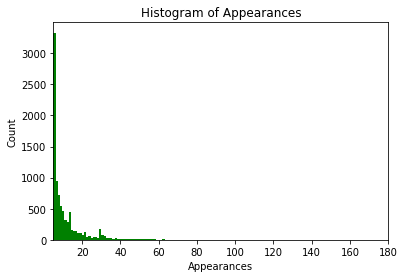

In [19]:
plt.hist(tracks['count'], bins=150, color='green')
plt.title('Histogram of Appearances')
plt.ylabel('Count')
plt.xlabel('Appearances')
plt.xlim(5,180)
plt.show()

As the histogram shows us, most of the songs in our quarantine tracks dataset appear less than 8 times in playlists with "Quarnatine" in their titles. The maximum amount of appearances that a song has is 176, and so the dataset is extremely right skewed. However, this does show that there is a decent amount of overlap in the songs people listen to during quarantine. Now that clearer understanding of our quarantine tracks is established, let's move on to the 2019 Top 50 songs.

For additional analysis and comparison, we are creating a DataFrame called "quarentine_top50", as coded below, that selects only the top 50 songs in the dataset based on the number of appearences. The cuttoff was 69 appearences to make it into the dataset.

In [20]:
quarantine_top50 = tracks[tracks['count']>69]

<h3> 2019's Top 50 songs - A dataset for comparison </h3>

In [21]:
# tracks_2019 = pd.read_csv("final_top50_2019.csv")
# tracks_2019.sort_values(by=['count'], ascending=False)[:20]

<p> Displayed above is a 20 song snippet from the top 50 songs in 2019. Note, the "count" column shows that each song appears only once, unlike our quarantine dataset. This makes sense, as this is a "top charts" where a song can't be featured more than once. </p>

In [22]:
tracks_2019 = pd.read_csv("tracks_list_2019.csv")
tracks_2019.sort_values(by=['count'], ascending=False)[:20]

,Unnamed: 0,acousticness,analysis_url,count,danceability,duration_ms,energy,explicit,id,instrumentalness,...,name,popularity,release_date,speechiness,tempo,time_signature,track_href,type,uri,valence
937,1650,0.32800,https://api.spotify.com/v1/audio-analysis/2Fxm...,183,0.701,194088,0.425,False,2Fxmhks0bxGSBdJ92vM42m,0.130000,...,bad guy,92,2019-03-29,0.3750,135.128,4,https://api.spotify.com/v1/tracks/2Fxmhks0bxGS...,audio_features,spotify:track:2Fxmhks0bxGSBdJ92vM42m,0.562
803,1415,0.03700,https://api.spotify.com/v1/audio-analysis/0TK2...,149,0.759,190960,0.540,False,0TK2YIli7K1leLovkQiNik,0.000000,...,Señorita,88,2019-06-21,0.0287,116.947,4,https://api.spotify.com/v1/tracks/0TK2YIli7K1l...,audio_features,spotify:track:0TK2YIli7K1leLovkQiNik,0.750
1570,3059,0.11000,https://api.spotify.com/v1/audio-analysis/5w9c...,146,0.737,193227,0.860,False,5w9c2J52mkdntKOmRLeM2m,0.000002,...,Con Calma,83,2019-01-24,0.0593,93.989,4,https://api.spotify.com/v1/tracks/5w9c2J52mkdn...,audio_features,spotify:track:5w9c2J52mkdntKOmRLeM2m,0.656
1408,2475,0.08460,https://api.spotify.com/v1/audio-analysis/2ksO...,140,0.786,301714,0.808,False,2ksOAxtIxY8yElEWw8RhgK,0.000289,...,China,86,2019-07-19,0.0882,105.027,4,https://api.spotify.com/v1/tracks/2ksOAxtIxY8y...,audio_features,spotify:track:2ksOAxtIxY8yElEWw8RhgK,0.609
1571,3060,0.39000,https://api.spotify.com/v1/audio-analysis/2qG5...,130,0.882,161627,0.689,False,2qG5sZ7Si6sdK74qLxedYM,0.003250,...,Con Altura,82,2019-03-28,0.1240,97.963,4,https://api.spotify.com/v1/tracks/2qG5sZ7Si6sd...,audio_features,spotify:track:2qG5sZ7Si6sdK74qLxedYM,0.746
1407,2473,0.03340,https://api.spotify.com/v1/audio-analysis/6cy3...,128,0.721,221714,0.716,True,6cy3ki60hLwimwIje7tALf,0.000840,...,RITMO (Bad Boys For Life),89,2019-10-12,0.0657,104.994,4,https://api.spotify.com/v1/tracks/6cy3ki60hLwi...,audio_features,spotify:track:6cy3ki60hLwimwIje7tALf,0.667
1757,3571,0.01250,https://api.spotify.com/v1/audio-analysis/6WrI...,111,0.794,183290,0.793,False,6WrI0LAC5M1Rw2MnX2ZvEg,0.000000,...,Don't Start Now,94,2019-10-31,0.0842,123.941,4,https://api.spotify.com/v1/tracks/6WrI0LAC5M1R...,audio_features,spotify:track:6WrI0LAC5M1Rw2MnX2ZvEg,0.677
1374,2416,0.29500,https://api.spotify.com/v1/audio-analysis/7k4t...,110,0.803,200960,0.715,False,7k4t7uLgtOxPwTpFmtJNTY,0.000134,...,Tusa,93,2019-11-07,0.2980,101.085,4,https://api.spotify.com/v1/tracks/7k4t7uLgtOxP...,audio_features,spotify:track:7k4t7uLgtOxPwTpFmtJNTY,0.574
832,1463,0.09120,https://api.spotify.com/v1/audio-analysis/3HVW...,110,0.798,219947,0.675,False,3HVWdVOQ0ZA45FuZGSfvns,0.000000,...,I Don't Care (with Justin Bieber),86,2019-05-10,0.0442,101.956,4,https://api.spotify.com/v1/tracks/3HVWdVOQ0ZA4...,audio_features,spotify:track:3HVWdVOQ0ZA45FuZGSfvns,0.842
1421,2496,0.60000,https://api.spotify.com/v1/audio-analysis/2TH6...,110,0.610,250534,0.624,True,2TH65lNHgvLxCKXM3apjxI,0.000002,...,Callaita,86,2019-05-31,0.3090,176.169,4,https://api.spotify.com/v1/tracks/2TH65lNHgvLx...,audio_features,spotify:track:2TH65lNHgvLxCKXM3apjxI,0.244


In [23]:
tracks_2019

,Unnamed: 0,acousticness,analysis_url,count,danceability,duration_ms,energy,explicit,id,instrumentalness,...,name,popularity,release_date,speechiness,tempo,time_signature,track_href,type,uri,valence
0,0,0.153000,https://api.spotify.com/v1/audio-analysis/3Wog...,5,0.641,283585,0.684,False,3WogGiNpaOmYcPwqslBgZG,0.000000,...,L'Amérique pleure,59,2019-10-04,0.0345,102.025,4,https://api.spotify.com/v1/tracks/3WogGiNpaOmY...,audio_features,spotify:track:3WogGiNpaOmYcPwqslBgZG,0.639
1,3,0.354000,https://api.spotify.com/v1/audio-analysis/23Na...,6,0.653,265053,0.622,False,23Na3MCF9QaYja7W7mVMxy,0.000000,...,Les étoiles filantes,53,2004-11-23,0.0399,129.892,4,https://api.spotify.com/v1/tracks/23Na3MCF9QaY...,audio_features,spotify:track:23Na3MCF9QaYja7W7mVMxy,0.530
2,5,0.853000,https://api.spotify.com/v1/audio-analysis/4tSf...,7,0.662,178293,0.436,False,4tSffeciMCcNIvITmh6QHP,0.000000,...,I Lost My Baby,48,1996-10-01,0.0651,92.857,4,https://api.spotify.com/v1/tracks/4tSffeciMCcN...,audio_features,spotify:track:4tSffeciMCcNIvITmh6QHP,0.627
3,17,0.000095,https://api.spotify.com/v1/audio-analysis/2SqZ...,6,0.672,311200,0.848,False,2SqZ6pmqXB5szlwEgaeDYW,0.000011,...,1990,44,1990-08-01,0.0635,122.051,4,https://api.spotify.com/v1/tracks/2SqZ6pmqXB5s...,audio_features,spotify:track:2SqZ6pmqXB5szlwEgaeDYW,0.600
4,27,0.378000,https://api.spotify.com/v1/audio-analysis/3WgK...,5,0.549,324615,0.721,False,3WgK1nC3pQmJ9UtBF4oNMR,0.000000,...,Dégénérations / Le reel du fossé,47,2003,0.1040,98.861,4,https://api.spotify.com/v1/tracks/3WgK1nC3pQmJ...,audio_features,spotify:track:3WgK1nC3pQmJ9UtBF4oNMR,0.873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7293,139374,0.110000,https://api.spotify.com/v1/audio-analysis/5YFu...,7,0.514,219723,0.791,False,5YFuOQ9AI7WDFEuFbydjeI,0.000007,...,Il Tuo Spritz a Metà (Se vuoi),38,2017-10-06,0.0358,102.935,4,https://api.spotify.com/v1/tracks/5YFuOQ9AI7WD...,audio_features,spotify:track:5YFuOQ9AI7WDFEuFbydjeI,0.611
7294,139377,0.520000,https://api.spotify.com/v1/audio-analysis/6dYK...,5,0.842,176833,0.467,False,6dYKKXUjHiOJm9zWujGbHG,0.000000,...,Cuore Usa&Getta,34,2017-01-15,0.0493,122.980,4,https://api.spotify.com/v1/tracks/6dYKKXUjHiOJ...,audio_features,spotify:track:6dYKKXUjHiOJm9zWujGbHG,0.714
7295,139386,0.302000,https://api.spotify.com/v1/audio-analysis/0NGS...,5,0.677,222000,0.599,False,0NGSPHHIeaKZ5Nt3gCXeBy,0.001200,...,27 Marzo,35,2017-01-15,0.0560,88.473,4,https://api.spotify.com/v1/tracks/0NGSPHHIeaKZ...,audio_features,spotify:track:0NGSPHHIeaKZ5Nt3gCXeBy,0.818
7296,139393,0.727000,https://api.spotify.com/v1/audio-analysis/1tnd...,5,0.609,211208,0.181,False,1tndIFaPXaZKO6Dtqqna66,0.000000,...,Sara,34,2017-01-15,0.0404,80.110,4,https://api.spotify.com/v1/tracks/1tndIFaPXaZK...,audio_features,spotify:track:1tndIFaPXaZKO6Dtqqna66,0.450


In [24]:
#need to explain this
new = concatenate_df()

<h2> I. Describing Music: Qualitative Audio Features</h2>

In order to best understand the music people listen to, Spotify provides audio analysis for all tracks in the Spotify Catalog. The analysis is broken up into certain features that desibe a song's structure and musical content (like rythm, pitch, timbre, etc). Specifically, each element is denoted by an integer or float that scores a certain characteristic of a given song. 
For the purpose of this research study, we will analyze 10 key audio features in detail, and compare the scores of these audio features from playlists made during quarentine to the top songs in 2019 (before the COVID-19 pandemic began). 


To start, We will look at four charactersitcs which we consider <em> straightforward </em> and <em>qualitative</em>. In other words, musicians and listeners alike can completely capture these features in a couple words. Note, Spotify scores these featues as integers, while the other six characteristics are scored as floats. The descriptions of each these features are summarized from Spotify's Web API reference guide. Thus, to begin, this initial analysis looks at:

1. **Popularity** - The popularity of a song is the most complex feature in this section of analysis, but Spotify still assigns this feature an integer value (specifically, between 0 and 100) and we consider it a qualititative description of a song. The popularity is calculated by an algorithm based mainly on the number of times a track has been played as well as how recent the song has been played. The Spotify Web API reference guide notes that "generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past." We recognize that there is also a score for artist and album popularity, but these are derived independently from track popularity and thus will not affect our subsequent analysis. 


2. **Explicitness**  - Spotify labels a song as explicit if the lyrics or content of the song meet a list of criteria which is considered unsuitable for childrien (such as strong language and references to violence or sexualized behavior). This audio feature gives explicit songs given a score of 1, while non-epxlicit songs are given a 0, making making analysis straightforward. 


3. **Key** - The estimated overall key of the track. This audio feature maps picthes using standard pitch class   notation. For example, 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, Spotify gives the song a value of -1, but this is a rarity.  


4. **Modality** - Modality refers to the mode of a track (major or minor), the type of scale from which its melodic content is derived. Major is represented by 1 and minor is represented by a 0 score.

<h3> 1. Popularity </h3>

<p> One of the first questions about quarantine songs is whether or not the songs' appearances in quarantine playlists is due to pure general popularity on spotify. To understand this, it's helpful to look at the popularity variable. However, while we analyze this variable for our quarantine dataset, doing the same for our top 2019 songs data would not provide fruitful results, as every song it contains is, by definition, extremely popular given the nature of the playlist. Thus, we will take a look solely at the popularity statistics of our quarantine dataset, as this is the data that will guide us to understanding the impact of popularity on the appearances of our quarantine songs. </p>

<p> Does popularity impact the number appearences in quarantine playlists? To answer this question, we will see if there is a correlation between a track's popularity level, and the number of times that song appears in the data set. </p>

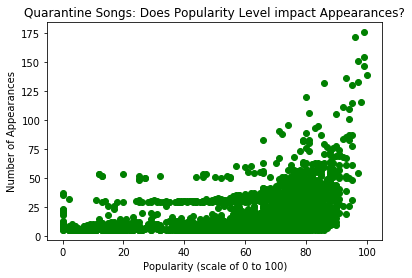

In [25]:
plt.scatter(tracks['popularity'], tracks['count'], marker = 'o', color = 'green')

plt.xlabel("Popularity (scale of 0 to 100)")
plt.ylabel("Number of Appearances")
plt.title("Quarantine Songs: Does Popularity Level impact Appearances?")
plt.show()

<p> There seems to be a clear positive relationship with these two variables. However, it doesn't seem exactly linear. We are interested in understanding the strength of correlation between these two variables. We'll use a variant called rank correlation, where each element of a vector has a rank. </p>

<p>Rank correlation (or Spearman correlation) is very similar to regular correlation (also called Pearson correlation), but it is more robust to relationships that aren't linear. Pearson correlation is to rank correlation as mean is to median. In both cases we can replace the actual value in an array with its *rank* in the array. The median is the value that has the mean rank (ie the midpoint), while the rank correlation is the Pearson correlation between the rank of $X_i$ and the rank of $Y_i$. <p>

<p>The following code defines datapoints that nearly lie on a line and calculates the slope of a regression line fit to the data. </p>

In [26]:
linear_model = LinearRegression().fit(tracks[['popularity']], tracks[['count']])
print("Linear model slope: {:.6f}".format(float(linear_model.coef_[0])))

Linear model slope: 0.220464


For each 1 point increase in popularity, the number of times the song appears in a quarantine playlist increases by roughly 0.22. Being more popular makes a song more likely to appear in quarantine playlists and thus our dataset of quarantine tracks. Let's see how well the data fits this linear model.

We can do this by looking at the correlation of:
1. the track counts and the track popularity
2. the *ranks* of the track counts and the *ranks* of the tracks popularity

In [27]:
print("Comparing Correlations for Popularity and Appearances")
corr_compare(tracks['popularity'], tracks['count'])

Comparing Correlations for Popularity and Appearances
Correlation: 0.2644
Correlation of ranks: 0.4717
Spearman r: 0.4717


As we can see, the correlation of ranks is much higher than the linear correlation. This makes sense, as we previously noted that the data is not exactly linear. By comparing the ranks, we can see how the more popular a song is in comparison to the rest of the songs, the more likely it is to be ranked higher in its number of appearances in our quarantine playlists.

<h4> Popularity Conclusion </h4>

<p> From the graphical visualization, it is clear that there is a positive relationship between popularity and the number of appearances in playlists. These two variables are clearly interconnected, as the more popular a song is, the wider its audience, the more well-known it is, and the more likely it is to appear in any one person's playlist. However, our correlation is quite small. This could be due to the fact that the data does not quite fit a linear model, as there is clear curvature in the graph. As such, the Spearman R of rank correlation is much higher than the standard linear correlation. Still, the Spearman r is not quite as high as initially expected. Despite this, through understanding of the data's context and the graphical representation of the data, it is concluded that popularity does impact the number of appearances the songs appeared in our quarantine tracks. Onward! </p>

---

<h3>2.  Explicitness </h3>

<p> Let's take a look at how many of the quarantine songs, as well as the 2019 songs, were explicit. </p>
<p>**Our Hypothesis:** We do not expect a large difference in the two dataset. Perhaps the quarantine playlists were slightly more explicit, but this would probably be due to chance. </p>

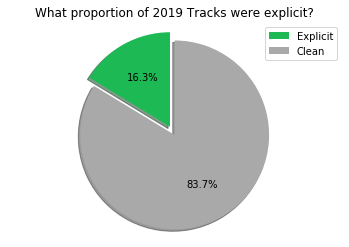

In [28]:
#2019 Tracks
explicit_2019 = pie_explicit(tracks_2019, '2019 Tracks')

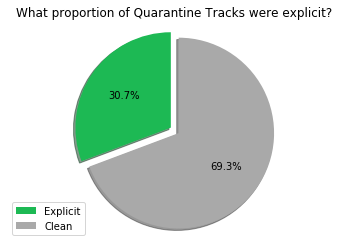

In [29]:
#Quarantine Tracks
explicit_quarantine = pie_explicit(tracks, "Quarantine Tracks")

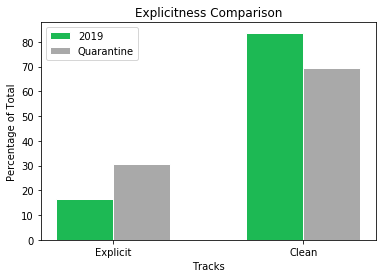

In [30]:
#Bar Chart comparison across 2019 and Quarantine Data
two_bar(explicit_2019, explicit_quarantine, title = "Explicitness Comparison", ticks = ['Explicit', 'Clean'])

<h4> Evaluation of Significance: Explicitness </h4>

In [31]:
print("The difference in explicit between Quarantine and 2019 songs:")
print(actual_diff('explicit'))

The difference in explicit between Quarantine and 2019 songs:
-0.144075


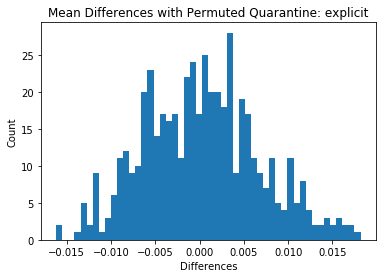

The difference in means of our data:  -0.144075


In [32]:
explicit_data = permuted_diff_list(feature = 'explicit', trials = 500)
plot_permuted_diff(feature = 'explicit', data = explicit_data)
print("The difference in means of our data: ", actual_diff('explicit'))

In [33]:
data_pvalue(data = explicit_data, trials = 500, feature = 'explicit')

permutations:
p_value from permutations:  0.00000000


NameError: name 'n' is not defined

In [ ]:
alpha = 0.05
t_test_means('explicit', alpha)

<h4> An Explicit Conclusion? </h4>
<p> Based on the data above, there is a clear change in the amount of explicit content people are listening to during quarantine. Only  16.3% of the 2019 songs featured explicit content, while that nearly doubled to to 30.7% during quarantine (a 14.4% difference). Furthermore, this difference is certainly statistically signficant, as both the p_value when running simulations as well as when conducting a T-test yielded a result approaching 0 (0.000000...x). Given the drastic percentage change, it is logical that it was almost impossible that this was due to random chance. </p>
<p> In sum, explicit music has almost doubled... and we thought people were being clean during quarantine!
Jokes aside, this is an interesting conclusion to start with, but we will need more audio features to fully draw out the effects of this pandemic on our music choices. </p>

---

<h3> 3. Key </h3> 

<p> **Our Hypothesis:** We do not expect to see significant change in the keys of songs. The most popular keys are stylistic choices that artists choose based on what sounds best. It is unlikely that quarantine alters our interest in music enough to see significant change in keys. With this prediction in mind, let's take a look... </p> 

In [ ]:
#Quarantine Tracks
tracks_keys_perc = key_counter(tracks)
key_pie(tracks_keys_perc, "Quarantine Tracks")

In [ ]:
#2019 Tracks
tracks_2019_keys_perc = key_counter(tracks_2019)
key_pie(tracks_2019_keys_perc, "2019 Tracks")

In [ ]:
#Bar chart comparing across 2019 and Quarantine Data
two_bar(tracks_keys_perc, tracks_2019_keys_perc, title = "Keys Comparison", ticks = ['C', 'C♯/D♭', 'D', 'D♯/E♭', 'E', 'F', 'F#/G♭', 'G', 'G♯/A♭', 'A', 'A♯/B♭', 'B'])

<h4> Conclusion: Key takaways </h4>

<p> The pie charts illustrates a few things. First, in both quarantine and 2019 datasets, the most popular Key's were C, and C♯/D♭, accounting for nearly 35% of the entire dataset when combined. That being said, the somewhat even distribution of the chart indicates that the key of a song does not have a <em> dramatic </em> effect on the song's success. In other words, there is no one key that dominates music. Stay away from D# though...
    
<p> More importantly, we see almost no change in the two datasets, illustrating that the quarantine has little effect on the key to which songs are written. Our hypothesis was correct. This wasn't the <em> key </em> to our research, unfortunately. </p>

<p> p.s. We hope our puns lighten up your quarantine </p>

<h3> Modality </h3>

<p>**Our Hypothesis:** We expect that the quarentine playlist featured more songs in minor keys, as the eerie nature of being locked at home might make some people more meloncholy, and thus listen to music associated with being sad. We expect this to be statistically one of the most significant changes of all the audio features. Modality is a good mesausre of the "happiness" of a song. This being said, many individuals are finding ways to stay active (especially running) during quarantine. Because running music usually has an upbeat, positive nature, so this may offset the sad nature of self-isolation slightly, but we nonetheless expect modality to decrease.  </p>

In [ ]:
#Quarantine Tracks
modality_breakdown_quarantine = mode_counter(tracks, "Quarantine Tracks")
modality_pie(modality_breakdown_quarantine,"Quarantine Tracks")

In [ ]:
#2019 Tracks
modality_breakdown_2019 = mode_counter(tracks_2019, "2019 Tracks")
modality_pie(modality_breakdown_2019, "2019 Tracks")

In [ ]:
#Bar chart comparing across 2019 and Quarantine Data
two_bar(modality_breakdown_2019, modality_breakdown_quarantine, title = "Modality Comparison", ticks = ["Major", "Minor"] )

<h4> Evaluation of Significance: Modality </h4>

In [ ]:
print("The difference in mean modality between Quarantine and 2019 songs:")
print(actual_diff('mode'))

In [ ]:
modality_data = permuted_diff_list(feature = 'mode', trials = 500)
plot_permuted_diff(feature = 'mode', data = modality_data)
print("The difference in means of our data: ", actual_diff('mode'))

In [ ]:
alpha = 0.05
trials = 500
feature = 'mode'
data_pvalue(data = modality_data, trials = 500, feature = 'mode')
t_test_means(feature = 'mode', alpha = 0.05)

<h4> Conclusion: Does our mood affect the mode? </h4>
<p> Our Hypothesis was incorrect. The Quarantine dataset had, in fact, a 2% higher average modality than the 2019's tracks. To put simply, the quarnatine songs were more cheery. This is encouraging, becuase it indicates that people might be using music to improve their mood during this difficult time, and our predicition about running music might have played a role as well. The simulations provided a P-value of 0.002, while the T-test provided an even smaller P-value approaching 0.0000. Because our dataset is so large (8000+ songs), a 2% change in modality is statistically significant, and meaningfull. 

---

<h2> II. Describing Music: Quantitative Audio Features </h2>

Next, we will analyze six complex audio features that Spotify denotes as floats, providing a sort of road map for each song. These remaining features include: 

5. **Energy** - According to Spotify's WEB API reference guide the Energy of a song "represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy." This is an excellent audio feature to analyze because it says something about the listener. 

  
6. **Danceability** - This audio feature is similair to energy, describing "how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity." 
   
   
7. **Valence** - A song's valence score is "describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)." This feature is particularly useful because it helps us as researchers understand the mood of a listener. While some people enjoy listening to sad music more than others, trend changes are visible when analyzing valence on a sample size of this scale.


8. **Acousticness** -  This is a confidence measure that determines whether a track is acoustic. Scores range from 0.0 to 1.0, providing a spectrum of musical range in between. 


9. **Speechiness** - This feature detects the presence of spoken words in a track. Unlike other categories, this score is especially useful in seperating other forms of audio (talks shows, audio books, poety) from pure musical recordings. Tracks of this nature recive a score close to 1.0. That being said, speechiness is useful in this analysis because it also helps seperate rap-muisc and genres with a high-concentration of speech/vocals from other types of music. The less words in the songs, the closer the speechiness score will get to 0.0


10. **Tempo** - Finally, tempo is the speed or pace of a given song, ervied directly from the average beat duration. It is measured in beats per minute (BPM) 

In [ ]:
#Summary Statistics for Quarantine Tracks
print("Summary Statistics for Quarantine Tracks")
summary_stats(tracks)

In [ ]:
#Summary Statistics for Quarantine Tracks
print("Summary Statistics for 2019 Tracks")
stats_2019 = summary_stats(tracks_2019)
stats_2019

<h3> 5. Energy </h3>

<p>**Our Hypothesis:** We expect that the the average energy score of the quarantine dataset would have dropped from people's 2019 music choices. This aligns with our prediction that quarantine is having a negative impact of people's mental health and that might be visible in our music. There have been less parties, less gatherings, and less reasons to be moving around. In general, the nature of quarantine <em> primes </em> us to beleive energy, much like modality, would have decreased significantly. 

In [ ]:
box_plot_comparisons('energy')

<h4> Evaluation of Significance: Energy </h4>

In [ ]:
print("The difference in mean energy between Quarantine and 2019 songs:")
print('{:.4f}'.format(actual_diff('energy')))

In [ ]:
energy_data = permuted_diff_list(feature = 'energy', trials = 500)
plot_permuted_diff(feature = 'energy', data = energy_data)
print("The difference in means of our data: ", actual_diff('energy'))

In [ ]:
data_pvalue(data = modality_data, trials = 500, feature = 'energy')
t_test_means(feature = 'energy', alpha = 0.05)

<h4> Conclusion: Effect on Energy </h4>
    
<p> Our hypothesis for energy appears to be correct. The average energy of the quarantine dataset decreased by approximately 6.4% from 2019's data, indicating that the overall loudness, timbre, onset rate, and general entropy of the music was lower. Our simulations provided a p-value approaching 0.000000..., and our t-test provided the same. A 6% change in a dataset this large is certainly statistically significant, and further guides our conclusions about the effect of isloation on music choice. </p>


---

<h3> 6. Danceability </h3>

<p> **Our Hypothesis:** Our Hypothesis for this audio feature is similair to that of energy. Bars, clubs, venues, and house parties have come to an almost complete stop. It is logical that the average danceability score would have decreased in quarantine.

In [ ]:
box_plot_comparisons('danceability')

<h4> Evaluation of Significance: Danceability </h4>

In [ ]:
print("The difference in mean danceability between Quarantine and 2019 songs:")
print(actual_diff('danceability'))

In [ ]:
danceability_data = permuted_diff_list(feature = 'danceability', trials = 500)
plot_permuted_diff(feature = 'danceability', data = danceability_data)
print("The difference in means of our data: ", actual_diff('danceability'))

In [ ]:
data_pvalue(data = modality_data, trials = 500, feature = 'danceability')
t_test_means(feature = 'danceability', alpha = 0.05)

<h4> Conclusion: Are we dancing at home? </h4>
<p> The data shows that the average danceability score actually <em> increased </em> by 0.76%. This is suprising, considering that the average energy scored decreased by 6.4%, as illustrated in the previous section. While this is the smallest change we've seen thus far, the change is still classified as statistically significant, yielding a 0.142 p-value from our simulations and a p-value extremely close to 0 from our T-test. Music suitable to dancing appears to be just as appealing alone as it is when allowed to be others. Maybe, without fearing judgement from our peers, people are finally breaking out some moves in the privacy of their home.

---

<h3> 7. Valence </h3>

<p>**Our Hypothesis:** Valence can be considered a somewhat quantitative measure of modality, in the sense that is measures the overall positiveness of a track (while major and minor keys are also associated with positive/negative themes, as well). Thus, like our prediction for modality, the nature of quarantine brings us to predict that valence will decrease significantly.

In [ ]:
box_plot_comparisons('valence')

<h4> Evaluation of Significance: Valence </h4>

In [ ]:
print("The difference in mean valence between Quarantine and 2019 songs:")
print(actual_diff('valence'))

In [ ]:
valence_data = permuted_diff_list(feature = 'valence', trials = 500)
plot_permuted_diff(feature = 'valence', data = valence_data)
print("The difference in means of our data: ", actual_diff('valence'))

In [ ]:
data_pvalue(data = valence_data, trials = 500, feature = 'valence')

In [ ]:
t_test_means(feature = 'valence', alpha = 0.05)

<h4> Conclusion: Is there value in valence? </h4>
<p> The data shows a 2.5% decrease in valence from 2019 to to Quarantine, signaling that our hypothesis was correct. Further, with p-values both approacing 0.000000 it is clear that a percentage decrease of this size is certaintly statistically significant. Now that we have analyzed both modality and valence, however, it is interesting that more songs were in minor keys, while the valence decreased significantly. We expected these two variables to increase proportionally.  

---

<h3> 8. Acousticness </h3>

<p>**Our Hypothesis:** Accousticness is an audio feature where we do not expect to see much change as a result of the quarantine. Listening to acoustic music is personal, style choice that is not as clear of a mood indicator as energy, valence, or danceability.

In [ ]:
box_plot_comparisons('acousticness')

<h4> Evaluation of Significance: Acousticness </h4>

In [ ]:
print("The difference in mean acousticness between Quarantine and 2019 songs:")
print(actual_diff('acousticness'))

In [ ]:
acousticness_data = permuted_diff_list(feature = 'acousticness', trials = 500)
plot_permuted_diff(feature = 'acousticness', data = acousticness_data)
print("The difference in means of our data: ", actual_diff('acousticness'))

In [ ]:
data_pvalue(data = acousticness_data, trials = 500, feature = 'acousticness')

In [ ]:
t_test_means(feature = 'acousticness', alpha = 0.05)

<h4> Conclusion: How are the acoustics during quarantine? </h4>
<p> There was an approximately 2.2% increase of accousticness in the quarantine dataset from 2019, and given both p-values (simulation and T-test) approached 0, this is a statistically significant change. It is hard to place a reason for this change, perhaps acoustic music is more soulful and comforting during a a dreary time? 

---

<h3> 9. Speechiness </h3>

<p>**Our Hypothesis:** Speechiness is a audio feature, similair to acousticness, that we don't believe is going to drastically change during quarentine. A higher average speechiness score would indicate more rap music is being listened to, which is possible, but we predict any increase or decrease will be less significant than the other audio features analyzed. 

In [ ]:
box_plot_comparisons('speechiness')

<h4> Evaluation of Significance: Speechiness </h4>

In [ ]:
print("The difference in mean speechiness between Quarantine and 2019 songs:")
print(actual_diff('speechiness'))

In [ ]:
speechiness_data = permuted_diff_list(feature = 'speechiness', trials = 500)
plot_permuted_diff(feature = 'speechiness', data = speechiness_data)
print("The difference in means of our data: ", actual_diff('speechiness'))

In [ ]:
data_pvalue(data = speechiness_data, trials = 500, feature = 'speechiness')

In [ ]:
t_test_means(feature = 'speechiness', alpha = 0.05)

<h4> Conclusion: Hard to <em> rap </em> our head around this one... </h4>
<p> There was a 1.3% increase in the average speechiness score of the quarantine dataset, and because both p-values were approximately 0, it's again almost impossible this was due to random chance. Admittidly, the change is not as significant as we've seen with other audio features, but it can't be ignored. People are listening to music with slightly more words. Lyrics, like poetry, often inspire and motivate us - and maybe we are turning to rap music for answers? Our final thoughts will provide a thorough explanation of this theme.</p>

---

<h3> 10. Tempo </h3>

<p>**Our Hypothesis:** Tempo is an audio feature most people understand without a description. Staying consistant with our overarching hypothesis, we expect the average tempo to decrease during quarantine. Sad music is categorically  considered "slow", while happy music is often up-beat and quick. 

In [ ]:
box_plot_comparisons('tempo')

<h4> Evaluation of Significance: Tempo </h4>

In [ ]:
print("The difference in mean tempo between Quarantine and 2019 songs:")
print(actual_diff('tempo'))

In [ ]:
tempo_data = permuted_diff_list(feature = 'tempo', trials = 500)
plot_permuted_diff(feature = 'tempo', data = energy_data)
print("The difference in means of our data: ", actual_diff('tempo'))

In [ ]:
data_pvalue(data = tempo_data, trials = 500, feature = 'tempo')

In [ ]:
t_test_means(feature = 'tempo', alpha = 0.05)

<h4> Conclusion on Tempo: Could quarantine fo any slower? </h4>
<p> As predicted, the average tempo of the quarantine songs decreased from 2019, by 2.84 beats per second. A change of this size is certainly statistically significant, yielding p-scores approximately equal to 0 on both the simulation and T-Test. While the tempo of a song does not exactly correlate with the mood, this supports the thoery  that people are listening to sadder, slower, and less energetic music while they sit at home. Of course, not all of the audio features supported this theme, but tempo clearly does. </p>

<h2> Concluding Thoughts </h2>

<p> In summary... </p>

<p> Biggest Takeaways </p>

<p> How confident are we? </p>

<p> What didn't work </p>

<p> Closing line </p>

---
---

<h2> Acknoledgements </h2>

1. Anders's genious brain
2. Kaela Giving good brain

---

In [ ]:
%%javascript
let words = 0;
Jupyter.notebook.get_cells().forEach(cell => {if (cell.cell_type == "markdown") { words += cell.element[0].innerText.split(" ").length }})
element.text("markdown words: " + words)